In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./gm2offline_ana_7893458_15937.00027.root")
f.cd("clusterTree")
f.ls()

TFile**		./gm2offline_ana_7893458_15937.00027.root	
 TFile*		./gm2offline_ana_7893458_15937.00027.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;94	clusters
   KEY: TTree	clusters;93	clusters
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder


In [3]:
t = f.Get("clusterTree").Get("clusters")

In [4]:
t.Print()

******************************************************************************
*Tree    :clusters  : clusters                                               *
*Entries : 99870478 : Total =      6791534622 bytes  File  Size = 2795647272 *
*        :          : Tree compression factor =   2.43                       *
******************************************************************************
*Br    0 :energy    : energy/D                                               *
*Entries : 99870478 : Total  Size=  798999061 bytes  File Size  =  760531572 *
*Baskets :      360 : Basket Size=   25600000 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :time      : time/D                                                 *
*Entries : 99870478 : Total  Size=  798998333 bytes  File Size  =  762480670 *
*Baskets :      360 : Basket Size=   25600000 bytes  Compression=   1.05     *
*...................................................

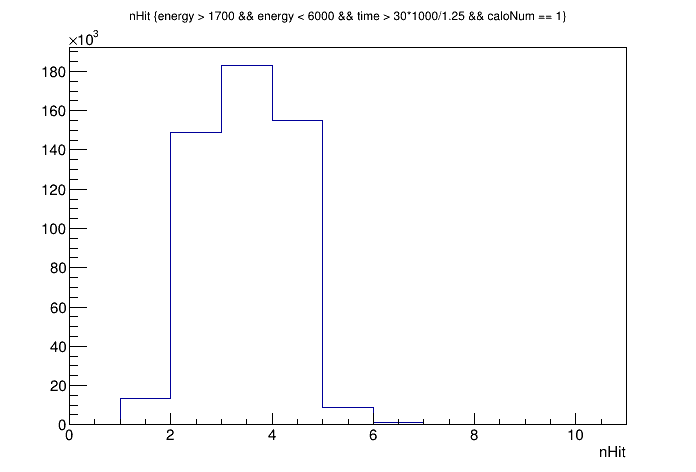

In [5]:
c = r.TCanvas()
t.Draw("nHit","energy > 1700 && energy < 6000 && time > 30*1000/1.25 && caloNum == 1","")
c.Draw()

In [6]:
t.Draw("caloNum","","")
h = r.gPad.GetPrimitive("htemp").Clone("caloListHist")
h.SetTitle("Entries/Calorimeter Number")

In [7]:
caloBinList = []
caloList = []
for i in range(1,h.GetNbinsX()-1):
    caloBinList.append(h.FindBin(i))
    caloList.append(i)
print(caloBinList, caloList)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


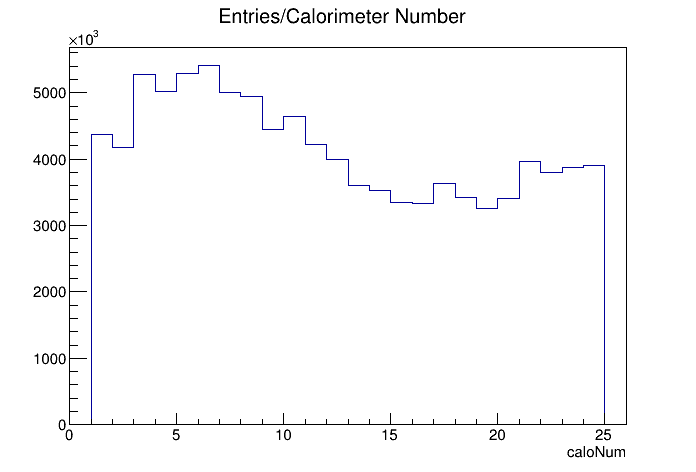

In [8]:
h.Draw()
c.Draw()

Now lets look at the number of counts per unique ID of (run, subrun, event). In order to do this, we'll draw all of those options from the tree with a cut for calorimeter number. Currently, calonum is set to 1, but we will easily be able to put this into a loop at a later date.

In [9]:
calonum = 1

In [10]:
cutString = "caloNum == "+str(calonum)
print(cutString)
c = r.TCanvas()

t.SetEstimate(-1) #https://root-forum.cern.ch/t/ttree-getv1-array-limits/3325
t.Draw("nHit:eventNum:subRunNum:runNum","","")
hUnique = r.gPad.GetPrimitive("htemp").Clone("uniqueIDhist")
print(hUnique.GetEntries())

listc = c.GetListOfPrimitives()
ding = listc.First()
print(ding)

eventNumVec = t.GetV2()
subRunNumVec = t.GetV3()
runNumVec = t.GetV4()
nHitVec = t.GetV1()

caloNum == 1
99870478.0
<ROOT.TH3F object ("htemp") at 0x7fffbdeb5970>


Error in <TBufferFile::WriteByteCount>: bytecount too large (more than 1073741822)
Error in <TBufferFile::WriteByteCount>: bytecount too large (more than 1073741822)
Error in <TBufferFile::WriteByteCount>: bytecount too large (more than 1073741822)
Error in <TBufferFile::CheckByteCount>: object of class TObjArray read too many bytes: 1198460317 instead of 124718493
Warning in <TBufferFile::CheckByteCount>: TObjArray::Streamer() not in sync with data, fix Streamer()


In [11]:
print(type(eventNumVec[0]))
for i in range(0,10):
    print(eventNumVec[i],runNumVec[i],subRunNumVec[i],nHitVec[i])
    ding = str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) 
    print(ding)

<class 'float'>
3.0 15937.0 27.0 54.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 1.0
15937273
3.0 15937.0 27.0 2.0
15937273
3.0 15937.0 27.0 1.0
15937273


Now lets create a global bin number by simply appending the event, run, and subrun numbers together. we can then loop over all of the entries in these lists and add up the ones with the same global bin number

In [12]:
'''globalBinNumber = int( str(int(runNumVec[0])) + str(int(subRunNumVec[0])) +str(int(eventNumVec[0])) )
runningTotal = 0
pairList = []
maxBin = int(hUnique.GetEntries() / 1 ) #change this denom back if you want this to work

for i in range(0,maxBin):
    globalBinNumberNew = int( str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) )
    if(i % 10000000 == 0):
        print("Processing event:", globalBinNumberNew, "(event", i,"/",maxBin," and caloNum",calonum," )")
#    print(i, maxBin-1,globalBinNumberNew, globalBinNumber)
    if(globalBinNumber == globalBinNumberNew):
        runningTotal = runningTotal + nHitVec[i]
    elif((globalBinNumber != globalBinNumberNew) or (i == maxBin-1)):
        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))
        runningTotal = nHitVec[i]
    
    if(i == maxBin-1):
        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))
        
    globalBinNumber = globalBinNumberNew
    
print("Found", len(pairList),"unique ID(s) for Calo", calonum) '''

'globalBinNumber = int( str(int(runNumVec[0])) + str(int(subRunNumVec[0])) +str(int(eventNumVec[0])) )\nrunningTotal = 0\npairList = []\nmaxBin = int(hUnique.GetEntries() / 1 ) #change this denom back if you want this to work\n\nfor i in range(0,maxBin):\n    globalBinNumberNew = int( str(int(runNumVec[i])) + str(int(subRunNumVec[i])) +str(int(eventNumVec[i])) )\n    if(i % 10000000 == 0):\n        print("Processing event:", globalBinNumberNew, "(event", i,"/",maxBin," and caloNum",calonum," )")\n#    print(i, maxBin-1,globalBinNumberNew, globalBinNumber)\n    if(globalBinNumber == globalBinNumberNew):\n        runningTotal = runningTotal + nHitVec[i]\n    elif((globalBinNumber != globalBinNumberNew) or (i == maxBin-1)):\n        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRunNumVec[i]), int(eventNumVec[i]),runningTotal))\n        runningTotal = nHitVec[i]\n    \n    if(i == maxBin-1):\n        pairList.append((calonum, globalBinNumber,int(runNumVec[i]),int(subRu

In [13]:
'''countList = [x[1] for x in pairList]''' #https://stackoverflow.com/questions/3308102/how-to-extract-the-n-th-elements-from-a-list-of-tuples-in-python

'countList = [x[1] for x in pairList]'

In [14]:
'''plt.plot(countList, "b.")
plt.ylabel('Calorimeter 1 Counts by Unique ID')
plt.show()'''

'plt.plot(countList, "b.")\nplt.ylabel(\'Calorimeter 1 Counts by Unique ID\')\nplt.show()'

We've checked that this works for calorimeter 1, so now lets go for the rest of them

In [20]:
import csv

#out = open('calo_data_output_cutEnergy.csv','w')
out = open('calo_data_output_energy_noConcatination.csv','w')
csv_out = csv.writer(out)
csv_out.writerow(['Calorimeter Number','Global Bin','Run Number','SubRun Number','Event Number','Counts'])
out.close()


for j in range(0,len(caloList)):
    calonum = caloList[j]
    print("Begin Calorimeter", calonum)

    #This string will determine the calorimeter number, energy, and time for the hit counting
#    cutString = "caloNum == "+str(calonum) 
    cutString = "caloNum == "+str(calonum)+" && energy>1700 && energy<6000 && time >30*1000/1.25"
    print("     "+cutString)
    c = r.TCanvas()

    t.SetEstimate(-1) #Makes sure that the vectors get filled properly for large values https://root-forum.cern.ch/t/ttree-getv1-array-limits/3325
#    t.Draw("nHit:eventNum:subRunNum:runNum",cutString,"") #original cut, which just counts the number of events
    t.Draw("energy:eventNum:subRunNum:runNum",cutString,"") #counts energy, not number of counts
    hUnique = r.gPad.GetPrimitive("htemp").Clone("uniqueIDhist") #get the histogram which was drawn for tree. Need to use this to determine the size of our vectors
#    print(hUnique.GetEntries())

    listc = c.GetListOfPrimitives()
    ding = listc.First()
    print("    ",ding) #making sure this is the histogram that we actually want

    #fill the vectors from the tree
    eventNumVec = t.GetV2()
    subRunNumVec = t.GetV3()
    runNumVec = t.GetV4()
    nHitVec = t.GetV1()
    
    #now lets set some initial parameters
    globalBinNumber = int( str(int(runNumVec[0])).zfill(5) + str(int(subRunNumVec[0])).zfill(4) +str(int(eventNumVec[0])).zfill(4) ) #zfill formatting so that each component has a consistent length
    runningTotal = 0
    pairList = []
    maxBin = int( hUnique.GetEntries() ) #need this to loop over all entries in histogram/vectors
    print("     Found",maxBin,"entries.")
    
    #make the GetVX()'s actual lists/vectors instead of just buffers. This will come in handy if we need > 4 vectors
    eventNumVec = list(eventNumVec[n] for n in range(maxBin+1))
    subRunNumVec = list(subRunNumVec[n] for n in range(maxBin+1))
    runNumVec = list(runNumVec[n] for n in range(maxBin+1))
    nHitVec = list(nHitVec[n] for n in range(maxBin+1))
#    print(len(eventNumVec),len(subRunNumVec),len(runNumVec),len(nHitVec),maxBin)

    for i in range(0,maxBin):
        globalBinNumberNew = int( str(int(runNumVec[i])).zfill(5) + str(int(subRunNumVec[i])).zfill(4) +str(int(eventNumVec[i])).zfill(4) )

        if(i % 100000 == 0):
            print("     Processing event:", globalBinNumberNew, "(event", i,"/",maxBin," and caloNum",calonum," )")
            
        if(globalBinNumber == globalBinNumberNew):
            runningTotal = 1*nHitVec[i]# + runningTotal
            pairList.append((calonum, globalBinNumber,int(runNumVec[i-1]),int(subRunNumVec[i-1]), int(eventNumVec[i-1]),runningTotal))

        else: #if the bin number is changed, we need to record the total of the
            pairList.append((calonum, globalBinNumber,int(runNumVec[i-1]),int(subRunNumVec[i-1]), int(eventNumVec[i-1]),runningTotal))
            runningTotal = 1*nHitVec[i]

        if(i == maxBin-1):
            pairList.append((calonum, globalBinNumber,int(runNumVec[i-1]),int(subRunNumVec[i-1]), int(eventNumVec[i-1]),runningTotal))
#            print(globalBinNumber)

        globalBinNumber = globalBinNumberNew

        
#    out = open('calo_data_output_cutEnergy.csv','a')
    out = open('calo_data_output_energy_noConcatination.csv','a')
    csv_out = csv.writer(out)
    for item in pairList:
        csv_out.writerow(item)
    out.close()
    
    print("Found", len(pairList),"unique ID(s) for Calo", calonum)

Begin Calorimeter 1
     caloNum == 1 && energy>1650 && energy<6000 && time >30*1000/1.25
     <ROOT.TH3F object ("htemp") at 0x7f1999ccbbf0>
     Found 549168 entries.
     Processing event: 1593700270003 (event 0 / 549168  and caloNum 1  )
     Processing event: 1594504360047 (event 100000 / 549168  and caloNum 1  )
     Processing event: 1593500310044 (event 200000 / 549168  and caloNum 1  )
     Processing event: 1597702350024 (event 300000 / 549168  and caloNum 1  )
     Processing event: 1598902490065 (event 400000 / 549168  and caloNum 1  )
     Processing event: 1597202950118 (event 500000 / 549168  and caloNum 1  )
Found 549169 unique ID(s) for Calo 1
Begin Calorimeter 2
     caloNum == 2 && energy>1650 && energy<6000 && time >30*1000/1.25
     <ROOT.TH3F object ("htemp") at 0x7f1999ccbbf0>
     Found 368521 entries.
     Processing event: 1593700270003 (event 0 / 368521  and caloNum 2  )
     Processing event: 1596300030125 (event 100000 / 368521  and caloNum 2  )
     Proces

Alright, now that we have that data stored in the file, we can crunch the numbers. We split this off into a different notebook for ease of viewing

In [16]:
'''c = r.TCanvas('c','c',1000,600)
r.gStyle.SetOptStat(0)

leg = r.TLegend(0.12,0.12,0.5,0.5)
calo_especs = []
wiggle  = f.Get('corrected')

for i in range(24):
    wiggle.GetZaxis().SetRange(i+1,i+1)
    wiggle.GetYaxis().SetRange(0,300)
    wiggle.GetXaxis().SetRange(300,1200)
    calo_especs.append(wiggle.Project3D('y_{}'.format(i+1)))
    calo_especs[i].Rebin(3)
    calo_especs[i].SetTitle('Calo Energy Spectrum')
    calo_especs[i].GetXaxis().SetRangeUser(1500,3000)
    calo_especs[i].SetMarkerSize(0.8)
    calo_especs[i].SetMarkerStyle(int(i/6)+20)
    calo_especs[i].Scale(1./calo_especs[i].GetEntries())
    calo_especs[i].GetYaxis().SetRangeUser(0.001,0.022)
    if i==0:
        calo_especs[i].Draw('EP')
    else:
        calo_especs[i].Draw('EP same')
  
    calo_especs[i].SetMarkerColor(i%6+1)
    calo_especs[i].SetLineColor(i%6+1)
    if (i%6+1) == 5:
        calo_especs[i].SetMarkerColor(7)
        calo_especs[i].SetLineColor(7)

    leg.AddEntry(calo_especs[i], 'Calo{}'.format(i+1), 'lp')

leg.SetNColumns(6)
leg.Draw()
c.SetLogy(1)
c.Draw()'''

"c = r.TCanvas('c','c',1000,600)\nr.gStyle.SetOptStat(0)\n\nleg = r.TLegend(0.12,0.12,0.5,0.5)\ncalo_especs = []\nwiggle  = f.Get('corrected')\n\nfor i in range(24):\n    wiggle.GetZaxis().SetRange(i+1,i+1)\n    wiggle.GetYaxis().SetRange(0,300)\n    wiggle.GetXaxis().SetRange(300,1200)\n    calo_especs.append(wiggle.Project3D('y_{}'.format(i+1)))\n    calo_especs[i].Rebin(3)\n    calo_especs[i].SetTitle('Calo Energy Spectrum')\n    calo_especs[i].GetXaxis().SetRangeUser(1500,3000)\n    calo_especs[i].SetMarkerSize(0.8)\n    calo_especs[i].SetMarkerStyle(int(i/6)+20)\n    calo_especs[i].Scale(1./calo_especs[i].GetEntries())\n    calo_especs[i].GetYaxis().SetRangeUser(0.001,0.022)\n    if i==0:\n        calo_especs[i].Draw('EP')\n    else:\n        calo_especs[i].Draw('EP same')\n  \n    calo_especs[i].SetMarkerColor(i%6+1)\n    calo_especs[i].SetLineColor(i%6+1)\n    if (i%6+1) == 5:\n        calo_especs[i].SetMarkerColor(7)\n        calo_especs[i].SetLineColor(7)\n\n    leg.AddEntry(c

In [17]:
t.SetEstimate(-1) #Makes sure that the vectors get filled properly for large values https://root-forum.cern.ch/t/ttree-getv1-array-limits/3325
t.Draw("nHit:eventNum:subRunNum:runNum",cutString,"") #original cut, which just counts the number of events
#    t.Draw("energy:eventNum:subRunNum:runNum",cutString,"") #counts energy, not number of counts
hUnique = r.gPad.GetPrimitive("htemp").Clone("uniqueIDhist") #get the histogram which was drawn for tree. Need to use this to determine the size of our vectors
#    print(hUnique.GetEntries())

listc = c.GetListOfPrimitives()
ding = listc.First()
print("    ",ding) #making sure this is the histogram that we actually want

#fill the vectors from the tree
eventNumVec = t.GetV2()
eventNumVec = list(eventNumVec[n] for n in range(maxBin))
subRunNumVec = t.GetV3()
runNumVec = t.GetV4()
nHitVec = t.GetV1()

t.Draw("energy:time",cutString,"") 
timeVec = t.GetV2()
energyVec = t.GetV1()

     <ROOT.TH3F object ("htemp") at 0x7fffbe5d9090>


In [18]:
print(eventNumVec[1],subRunNumVec[1],runNumVec[1],nHitVec[1])
print(timeVec[1],energyVec[1])
print(eventNumVecReal[1])

3.0 27.0 15937.0 2258.1173667503194
30666.120045657364 2258.1173667503194


NameError: name 'eventNumVecReal' is not defined

In [ ]:
print(type(eventNumVecReal),type(subRunNumVec))

In [ ]:
print(type(eventNumVec),type(subRunNumVec))

In [ ]:
for i in range(300):
    print(eventNumVec[i])